In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sct

In [8]:
data = pd.read_csv("data3a.csv",dtype={"y": int,"x":float, "f":"category"})

In [12]:
data.head()

,y,x,f
0,6,8.31,C
1,6,9.44,C
2,6,9.50,C
3,12,9.07,C
4,10,10.16,C


In [11]:
data.x.head()

0     8.31
1     9.44
2     9.50
3     9.07
4    10.16
Name: x, dtype: float64

In [15]:
data.y.head()

0     6
1     6
2     6
3    12
4    10
Name: y, dtype: int64

In [16]:
data.f.head()

0    C
1    C
2    C
3    C
4    C
Name: f, dtype: category
Categories (2, object): [C, T]

In [17]:
data.describe()

,y,x
count,100.000000,100.000000
mean,7.830000,10.089100
std,2.624881,1.008049
min,2.000000,7.190000
25%,6.000000,9.427500
50%,8.000000,10.155000
75%,10.000000,10.685000
max,15.000000,12.400000


In [18]:
data.f.describe()

count     100
unique      2
top         T
freq       50
Name: f, dtype: object

Text(0, 0.5, 'y')

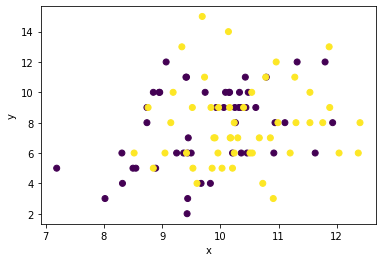

In [22]:
plt.scatter(data.x,data.y,c=data.f.cat.codes)
plt.xlabel("x")
plt.ylabel("y")

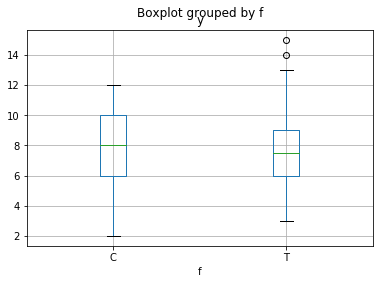

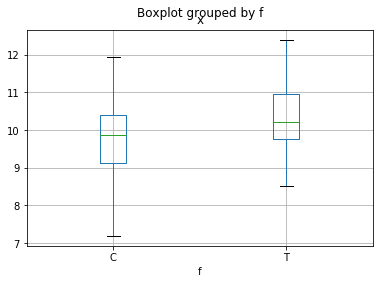

In [25]:
data.boxplot(column="y", by="f")
data.boxplot(column="x", by="f")

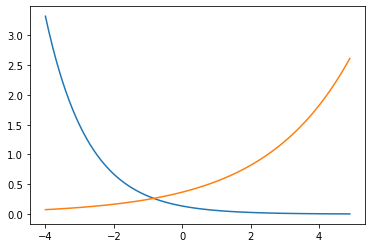

In [43]:
x = np.arange(-4, 5, 0.1)
def link_func(b1, b2, x):
    return np.exp(b1+b2*x)
plt.plot(x, link_func(-2, -0.8, x))
plt.plot(x, link_func(-1, 0.4, x))

In [46]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
model = smf.glm('y ~ x',data=data,family=sm.families.Poisson())

In [47]:
result = model.fit()

In [50]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -235.39
Date:                Sat, 03 Aug 2019   Deviance:                       84.993
Time:                        14:41:02   Pearson chi2:                     83.8
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2917      0.364      3.552      0.000       0.579       2.005
x              0.0757      0.036      2.125      0.034       0.006       0.145
==============================================================================
"""

- coef: 推定値. Intercept=b1, x=b2
- std err: coefの標準偏差
- z: Wald特徴量, zが0に近いとその項は無視できる
- P>|z|: 推定値の信頼区間が近似的に算出できたと思えば良い

In [53]:
result.llf#対数尤度

-235.3862507698608

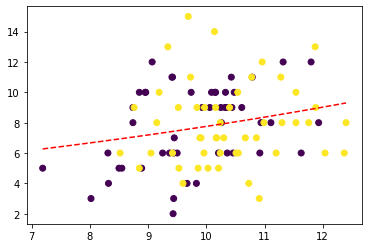

In [56]:
x= np.linspace(min(data.x),max(data.x),100)
y = np.exp(result.params["Intercept"] + x*result.params["x"])

plt.scatter(data.x,data.y,c=data.f.cat.codes)
plt.plot(x,y,"r--")
plt.show()

In [61]:
model = smf.glm('y ~ f',data=data,family=sm.families.Poisson())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -237.63
Date:                Sat, 03 Aug 2019   Deviance:                       89.475
Time:                        15:05:22   Pearson chi2:                     87.1
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0516      0.051     40.463      0.000       1.952       2.151
f[T.T]         0.0128      0.071      0.179      0.858      -0.127       0.153
==============================================================================
"""

In [63]:
result.llf

-237.62725696068682

In [65]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
model = smf.glm('y ~ x + f',data=data,family=sm.families.Poisson())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -235.29
Date:                Sun, 04 Aug 2019   Deviance:                       84.808
Time:                        20:58:49   Pearson chi2:                     83.8
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2631      0.370      3.417      0.001       0.539       1.988
f[T.T]        -0.0320      0.074     -0.430      0.667      -0.178       0.114
x              0.0801      0.037      2.162      0.031       0.007       0.153
==============================================================================
"""

In [68]:
result.llf

-235.29371924249367

In [69]:
result.df_model

2

In [80]:
from sklearn.datasets import load_linnerud
linnerud = load_linnerud()

In [81]:
linnerud

{'data': array([[  5., 162.,  60.],
        [  2., 110.,  60.],
        [ 12., 101., 101.],
        [ 12., 105.,  37.],
        [ 13., 155.,  58.],
        [  4., 101.,  42.],
        [  8., 101.,  38.],
        [  6., 125.,  40.],
        [ 15., 200.,  40.],
        [ 17., 251., 250.],
        [ 17., 120.,  38.],
        [ 13., 210., 115.],
        [ 14., 215., 105.],
        [  1.,  50.,  50.],
        [  6.,  70.,  31.],
        [ 12., 210., 120.],
        [  4.,  60.,  25.],
        [ 11., 230.,  80.],
        [ 15., 225.,  73.],
        [  2., 110.,  43.]]),
 'feature_names': ['Chins', 'Situps', 'Jumps'],
 'target': array([[191.,  36.,  50.],
        [189.,  37.,  52.],
        [193.,  38.,  58.],
        [162.,  35.,  62.],
        [189.,  35.,  46.],
        [182.,  36.,  56.],
        [211.,  38.,  56.],
        [167.,  34.,  60.],
        [176.,  31.,  74.],
        [154.,  33.,  56.],
        [169.,  34.,  50.],
        [166.,  33.,  52.],
        [154.,  34.,  64.],
        

In [82]:
df_csj = pd.DataFrame(linnerud.data, columns=linnerudo.feature_names)

In [83]:
df_csj.head()

,Chins,Situps,Jumps
0,5.0,162.0,60.0
1,2.0,110.0,60.0
2,12.0,101.0,101.0
3,12.0,105.0,37.0
4,13.0,155.0,58.0


In [85]:
df_wwp = pd.DataFrame(linnerud.target,columns=linnerud.target_names)

In [87]:
df_wwp.head()

,Weight,Waist,Pulse
0,191.0,36.0,50.0
1,189.0,37.0,52.0
2,193.0,38.0,58.0
3,162.0,35.0,62.0
4,189.0,35.0,46.0


In [88]:
df_wwp["Chins"] = df_csj.Chins

In [93]:
df_wwp

,Weight,Waist,Pulse,Chins
0,191.0,36.0,50.0,5.0
1,189.0,37.0,52.0,2.0
2,193.0,38.0,58.0,12.0
3,162.0,35.0,62.0,12.0
4,189.0,35.0,46.0,13.0
5,182.0,36.0,56.0,4.0
6,211.0,38.0,56.0,8.0
7,167.0,34.0,60.0,6.0
8,176.0,31.0,74.0,15.0
9,154.0,33.0,56.0,17.0


In [95]:
model = smf.glm('Chins ~ Weight + Waist + Pulse',data=df_wwp,family=sm.families.Poisson())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Chins   No. Observations:                   20
Model:                            GLM   Df Residuals:                       16
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -60.048
Date:                Sun, 04 Aug 2019   Deviance:                       42.548
Time:                        23:23:17   Pearson chi2:                     39.8
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.7521      1.503      5.157      0.000       4.806      10.698
Weight         0.0067      0.006      1.168      0.243      -0.005       0.018
Waist         -0.1807      0.049     -3.654      0.000      -0.278      -0.084
Pulse         -0.0068      0.010     -0.677      0.499      -0.027       0.013
==============================================================================
"""

In [96]:
df_wwp["predict"] = result.predict(df_wwp[["Weight","Waist","Pulse"]])

In [97]:
df_wwp.head()

,Weight,Waist,Pulse,Chins,predict
0,191.0,36.0,50.0,5.0,8.946231
1,189.0,37.0,52.0,2.0,7.267619
2,193.0,38.0,58.0,12.0,5.981289
3,162.0,35.0,62.0,12.0,8.122894
4,189.0,35.0,46.0,13.0,10.867774


Text(0, 0.5, 'Predict')

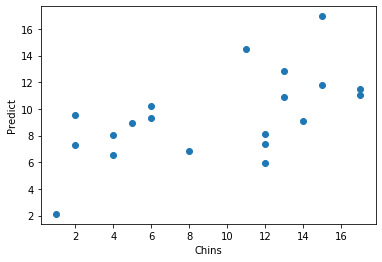

In [98]:
plt.scatter(df_wwp.Chins,df_wwp.predict)
plt.xlabel("Chins")
plt.ylabel("Predict")